In [65]:
import pandas as pd
from pandas.plotting import table
import requests
import json
from config import key, bkey
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook, ticker, units
import datetime
import functools
import re

## US Census Data API

In [66]:
census = pd.read_html('https://api.census.gov/data.html')[0]

In [67]:
list(census["Title"])

['1986 County Business Patterns: Business Patterns',
 '1987 County Business Patterns: Business Patterns',
 '1988 County Business Patterns: Business Patterns',
 '1989 County Business Patterns: Business Patterns',
 '1990 County Business Patterns: Business Patterns',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: County Estimates by 5 Year Age Groups, Race by Sex, and Hispanic Origin',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Civilian Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident plus Armed Forces Overseas Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident Population Estimates by Age and Sex',
 '1991 County Business Patterns: Business Patterns',
 '1992 County Business Patterns: Business Patterns',
 '1993 County Business Patterns: Business Patterns',
 '1994 County Business Patterns: Busines

### International Trade

In [68]:
trade_census = census[census["Title"].str.contains("International Trade")]
pd.set_option('display.max_colwidth', None)
trade_census

,Title,Description,Vintage,Dataset Name,Dataset Type,Geography List,Variable List,Group List,Examples,Developer Documentation,API Base URL
305,2014 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2014,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2014/intltrade/imp_exp
351,2015 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2015,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2015/intltrade/imp_exp
377,2016 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2016,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2016/intltrade/imp_exp
460,2017 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2017,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2017/intltrade/imp_exp
491,2018 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2018,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2018/intltrade/imp_exp
536,Time Series Economic Indicators Time Series -: U.S. International Trade in Goods and Services,"The U.S. Census Bureau.s economic indicator surveys provide monthly and quarterly data that are timely, reliable, and offer comprehensive measures of the U.S. economy. These surveys produce a variety of statistics covering construction, housing, international trade, retail trade, wholesale trade, services and manufacturing. The survey data provide measures of 

# Import

### Time Series International Trade: Monthly U.S. Imports by Port and Harmonized System (HS) Code<br>
The Port HS endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the port level for all U.S. trading partners. The Census data API will help users research new markets for their products, establish pricing structures for potential export markets, and conduct economic planning.

#### Variables

In [69]:
portVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/porths/variables.html')[0]
portVar

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIR_VAL_MO,15-digit Air Value,Measures,not required,NaN,0,int,NaN,NaN
1,AIR_VAL_YR,15-digit Year-to-Date Air Value,Measures,not required,NaN,0,int,NaN,NaN
2,AIR_WGT_MO,15-digit Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
3,AIR_WGT_YR,15-digit Year-to-Date Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
4,CNT_VAL_MO,15-digit Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
5,CNT_VAL_YR,15-digit Year-to-Date Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
6,CNT_WGT_MO,15-digit Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
7,CNT_WGT_YR,15-digit Year-to-Date Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
8,COMM_LVL,4-character aggregation levels for commodity code. HS2=2-digit HS totals. HS4=4-digit HS totals. HS6=6-digit HS totals.,Measures,not required,NaN,0,string,NaN,NaN
9,CTY_CODE,4-character Country Code,Measures,default displayed,NaN,0,string,NaN,NaN


In [70]:
portDict = dict(zip(portVar["Name"], portVar["Label"].str.replace('15-digit ', '')))

## Port and Container Count

In [71]:
portURL = 'https://api.census.gov/data/timeseries/intltrade/imports/porths?get='
portURLreq = requests.get(f"{portURL}PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key={key}")
print(portURLreq.url)

https://api.census.gov/data/timeseries/intltrade/imports/porths?get=PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [72]:
portData = portURLreq.json()
portDF = pd.DataFrame(portData, columns=portData[0]).drop([0]).rename(columns=portDict)
pd.set_option('display.max_colwidth', None)
portDF

,4-character Port Code,150-character Port Name,Containerized Vessel Shipping Weight,ISO-8601 Date/Time value
1,-,TOTAL FOR ALL PORTS,15840254477,2019-01
2,-,TOTAL FOR ALL PORTS,13329969180,2019-02
3,-,TOTAL FOR ALL PORTS,14054279566,2019-03
4,-,TOTAL FOR ALL PORTS,14721360090,2019-04
5,-,TOTAL FOR ALL PORTS,15441730719,2019-05
...,...,...,...,...
9367,2401,"YSLETA, TX",0,2020-11
9368,2401,"YSLETA, TX",0,2020-12
9369,2401,"YSLETA, TX",0,2021-01
9370,2401,"YSLETA, TX",0,2021-02


In [73]:
port = portDF[~portDF['150-character Port Name'].str.contains("TOTAL")].drop(columns=['4-character Port Code']).rename(columns={'150-character Port Name':'Port','ISO-8601 Date/Time value':'Date'})
#port['Date'] = pd.to_datetime(port['Date'])
port.head()

,Port,Containerized Vessel Shipping Weight,Date
28,"PORTLAND, ME",8582227,2019-01
29,"PORTLAND, ME",14823829,2019-02
30,"PORTLAND, ME",12000667,2019-03
31,"PORTLAND, ME",19453602,2019-04
32,"PORTLAND, ME",14481568,2019-05


In [74]:
port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9344 entries, 28 to 9371
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Port                                  9344 non-null   object
 1   Containerized Vessel Shipping Weight  9344 non-null   object
 2   Date                                  9344 non-null   object
dtypes: object(3)
memory usage: 292.0+ KB


In [75]:
portCOL = port.columns.drop(['Port',"Date"])
port[portCOL] = port[portCOL].apply(pd.to_numeric, errors='coerce')

In [76]:
port.head()

,Port,Containerized Vessel Shipping Weight,Date
28,"PORTLAND, ME",8582227,2019-01
29,"PORTLAND, ME",14823829,2019-02
30,"PORTLAND, ME",12000667,2019-03
31,"PORTLAND, ME",19453602,2019-04
32,"PORTLAND, ME",14481568,2019-05


Consolidate Port by State

In [77]:
list(port['Port'].unique())

['PORTLAND, ME',
 'BANGOR, ME',
 'EASTPORT, ME',
 'JACKMAN, ME',
 'VANCEBORO, ME',
 'HOULTON, ME',
 'FORT FAIRFIELD, ME',
 'VAN BUREN, ME',
 'MADAWASKA, ME',
 'FORT KENT, ME',
 'BATH, ME',
 'BAR HARBOR, ME',
 'CALAIS, ME',
 'LIMESTONE, ME',
 'ROCKLAND, ME',
 'JONESPORT, ME',
 'BRIDGEWATER, ME',
 'PORTSMOUTH, NH',
 'BELFAST, ME',
 'SEARSPORT, ME',
 'MANCHESTER USER FEE AIRPORT, NH',
 'ST. ALBANS, VT',
 'RICHFORD, VT',
 'BEECHER FALLS, VT',
 'BURLINGTON, VT',
 'DERBY LINE, VT',
 'NORTON, VT',
 'HIGHGATE SPRINGS-ALBURG, VT',
 'BOSTON, MA',
 'SPRINGFIELD, MA',
 'WORCESTER, MA',
 'GLOUCESTER, MA',
 'NEW BEDFORD, MA',
 'PLYMOUTH, MA',
 'FALL RIVER, MA',
 'SALEM, MA',
 'BRIDGEPORT, CT',
 'HARTFORD, CT',
 'NEW HAVEN, CT',
 'NEW LONDON, CT',
 'LAWRENCE, MA',
 'LOGAN AIRPORT, MA',
 'L.G. HANSCOM FIELD, BEDFORD, MA',
 'NEWPORT, RI',
 'PROVIDENCE, RI',
 'OGDENSBURG, NY',
 'MASSENA, NY',
 'ALEXANDRIA BAY, NY',
 'CHAMPLAIN-ROUSES POINT, NY',
 'TROUT RIVER, NY',
 'BUFFALO-NIAGARA FALLS, NY',
 'ROCHES

In [78]:
portST = port.copy()
portST['Port State'] = port['Port'].str[-2:]

In [79]:
portST.head()

,Port,Containerized Vessel Shipping Weight,Date,Port State
28,"PORTLAND, ME",8582227,2019-01,ME
29,"PORTLAND, ME",14823829,2019-02,ME
30,"PORTLAND, ME",12000667,2019-03,ME
31,"PORTLAND, ME",19453602,2019-04,ME
32,"PORTLAND, ME",14481568,2019-05,ME


In [80]:
portST = portST.groupby(['Date','Port State']).sum().reset_index().rename(columns={'Containerized Vessel Shipping Weight':'Weight'})
portCT = port.groupby(['Date','Port']).sum().rename(columns={'Containerized Vessel Shipping Weight':'Weight'})
portCT

Weight
Date    Port                                  
2019-01 ABERDEEN-HOQUIAM, WA             56832
        ADDISON AIRPORT, DALLAS, TX          0
        AGUADILLA, PR                   188800
        ALBANY, NY                    34500000
        ALBUQUERQUE, NM                      0
...                                        ...
2021-03 WILMINGTON, DE               195855183
        WILMINGTON, NC                86906036
        WINSTON-SALEM, NC                    0
        WORCESTER, MA                        0
        YSLETA, TX                           0

[9344 rows x 1 columns]

In [81]:
cleanPort = portST[(portST.Weight != 0)]
portCT = portCT[(portCT.Weight != 0)]
portCT

Weight
Date    Port                           
2019-01 ABERDEEN-HOQUIAM, WA      56832
        AGUADILLA, PR            188800
        ALBANY, NY             34500000
        ALEXANDRIA BAY, NY        18273
        ANCHORAGE, AK           3377105
...                                 ...
2021-03 VANCOUVER, WA            105556
        WASHINGTON, DC           691161
        WEST PALM BEACH, FL    10700494
        WILMINGTON, DE        195855183
        WILMINGTON, NC         86906036

[2618 rows x 1 columns]

In [82]:
cleanPort

,Date,Port State,Weight
0,2019-01,AK,3377105
1,2019-01,AL,116945198
4,2019-01,CA,5217244404
6,2019-01,CT,10767755
7,2019-01,DC,637104
...,...,...,...
1449,2021-03,TX,1283579816
1452,2021-03,VA,901597179
1453,2021-03,VI,1033957
1455,2021-03,WA,905977208


### Estimate TEU Count (Twenty Equivalent Count) = 1 Twenty Foot Container

Estimate Container count by dividing Weight(kg) to tons. <br>
1 TEU = 24,000 kg max load weight

In [83]:
stateportTEU = cleanPort.copy().rename(columns={'Port State':'Port'})
cityportTEU = portCT.copy()

In [84]:
stateportTEU['TEU'] = stateportTEU['Weight'].floordiv(24000)
cityportTEU['TEU'] = cityportTEU['Weight'].floordiv(24000)

In [85]:
stateportTEU = stateportTEU.groupby(['Date','Port']).sum().sort_values('TEU')
stateportTEU

,,Weight,TEU
Date,Port,,
2019-06,NH,15230,0
2020-12,NH,632,0
2019-02,RI,4703,0
2019-09,IN,1798,0
2021-02,NH,632,0
...,...,...,...
2020-07,CA,5334165420,222256
2020-09,CA,5451893813,227162
2020-12,CA,5464219765,227675


In [86]:
cityportTEU = cityportTEU.groupby(['Date','Port']).sum().sort_values('TEU')
cityportTEU

Weight     TEU
Date    Port                                   
2020-08 OGDENSBURG, NY             7421       0
2021-02 GREENVILLE, MS              729       0
2020-11 VICKSBURG, MS              1346       0
        TEXAS CITY, TX              755       0
2019-11 TOLEDO-SANDUSKY, OH        2914       0
...                                 ...     ...
2019-01 LOS ANGELES, CA      3521311625  146721
2020-09 LOS ANGELES, CA      3549580177  147899
2020-12 LOS ANGELES, CA      3586722193  149446
2021-03 LOS ANGELES, CA      3636611951  151525
2020-10 LOS ANGELES, CA      3659433611  152476

[2618 rows x 2 columns]

In [87]:
stateportTEU = stateportTEU[(stateportTEU.TEU != 0)].reset_index()
cityportTEU = cityportTEU[(cityportTEU.TEU != 0)].reset_index()

In [88]:
pivotstateportTEU = stateportTEU.pivot(index="Date", columns="Port", values="TEU")
pivotstateportTEU

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01,140.0,4872.0,217385.0,448.0,26.0,6179.0,37466.0,56873.0,2925.0,214.0,...,7.0,15897.0,14315.0,NaN,29590.0,46389.0,34020.0,84.0,34506.0,27.0
2019-02,166.0,4520.0,180709.0,NaN,28.0,6479.0,38235.0,42652.0,1045.0,990.0,...,14.0,12656.0,8886.0,NaN,25052.0,37289.0,31496.0,44.0,29491.0,36.0
2019-03,119.0,5143.0,164047.0,76.0,19.0,7556.0,38670.0,52893.0,5638.0,63.0,...,7.0,14218.0,13601.0,NaN,28678.0,51230.0,33395.0,47.0,28927.0,22.0
2019-04,192.0,5408.0,186709.0,68.0,13.0,7464.0,36484.0,49944.0,5070.0,254.0,...,4.0,16923.0,14734.0,929.0,28385.0,48500.0,37582.0,29.0,31650.0,10.0
2019-05,61.0,5104.0,207305.0,NaN,27.0,5801.0,34992.0,53432.0,2928.0,208.0,...,2.0,15380.0,9348.0,1.0,29704.0,45982.0,36015.0,44.0,35228.0,8.0
2019-06,198.0,4823.0,190456.0,22.0,14.0,6404.0,35049.0,47916.0,5033.0,1459.0,...,3.0,13903.0,13830.0,38.0,25951.0,48266.0,32911.0,115.0,30023.0,61.0
2019-07,211.0,5275.0,217710.0,NaN,28.0,6660.0,35172.0,54974.0,465.0,215.0,...,9.0,17437.0,11842.0,32.0,28917.0,44572.0,36414.0,77.0,34040.0,43.0
2019-08,128.0,5583.0,202875.0,NaN,26.0,6578.0,34783.0,58294.0,4725.0,62.0,...,177.0,14684.0,14768.0,53.0,30554.0,48202.0,33821.0,37.0,33035.0,694.0
2019-09,121.0,6307.0,193146.0,NaN,31.0,5710.0,33003.0,51582.0,2778.0,177.0,...,49.0,14381.0,15447.0,2.0,28535.0,42010.0,33442.0,34.0,30863.0,6.0


In [89]:
pivotcityportTEU = cityportTEU.pivot(index="Date", columns="Port", values="TEU")
pivotcityportTEU.head()

Port,"ABERDEEN-HOQUIAM, WA","AGUADILLA, PR","ALBANY, NY","ALEXANDRIA BAY, NY","ANACORTES, WA","ANCHORAGE, AK","ANNAPOLIS, MD","ASHTABULA-CONNEAUT, OH","ASTORIA, OR","BALTIMORE, MD",...,"TAMPA, FL","TEXAS CITY, TX","TOLEDO-SANDUSKY, OH","VANCOUVER, WA","VENTURA, CA","VICKSBURG, MS","WASHINGTON, DC","WEST PALM BEACH, FL","WILMINGTON, DE","WILMINGTON, NC"
Date,,,,,,,,,,,,,,,,,,,,,
2019-01,2.0,7.0,1437.0,NaN,NaN,140.0,1.0,NaN,1.0,20587.0,...,1636.0,NaN,NaN,6.0,NaN,NaN,26.0,344.0,6179.0,2810.0
2019-02,3.0,NaN,NaN,1.0,NaN,166.0,1.0,NaN,NaN,16803.0,...,2028.0,NaN,1.0,45.0,NaN,NaN,28.0,453.0,6479.0,2278.0
2019-03,NaN,NaN,NaN,1.0,NaN,119.0,NaN,NaN,NaN,19112.0,...,2119.0,NaN,NaN,9.0,NaN,NaN,19.0,397.0,7556.0,4174.0
2019-04,NaN,3.0,NaN,NaN,NaN,192.0,19.0,NaN,NaN,19455.0,...,1991.0,NaN,NaN,9.0,NaN,NaN,13.0,410.0,7464.0,2871.0
2019-05,9.0,NaN,NaN,NaN,1.0,61.0,10.0,NaN,NaN,21750.0,...,1823.0,NaN,NaN,3.0,NaN,NaN,27.0,411.0,5801.0,2863.0


In [90]:
pivotcityportTEU.to_json("./static/data/pivotcityportTEU.json")
pivotstateportTEU.to_json("./static/data/pivotstateportTEU.json")

In [91]:
pivotcityportTEU.to_csv("./static/data/pivotcityportTEU.csv")
pivotstateportTEU.to_csv("./static/data/pivotstateportTEU.csv")

In [92]:
stateportTEU.to_json("./static/data/stateportTEU.json")
cityportTEU.to_json("./static/data/cityportTEU.json")

In [93]:
cityportTEU = cityportTEU.set_index('Date')
stateportTEU = stateportTEU.set_index('Date')

In [94]:
cityportTEU.to_csv("./static/data/cityportTEU.csv")
stateportTEU.to_csv("./static/data/stateportTEU.csv")

### Heatmap - Total Container Count by State & Date

In [95]:
STEU = stateportTEU.copy()

In [96]:
STEU = STEU.reset_index()
STEU

,Date,Port,Weight,TEU
0,2020-11,WI,32161,1
1,2020-05,KY,34962,1
2,2020-07,CT,40656,1
3,2020-09,KY,47244,1
4,2021-01,WI,47014,1
...,...,...,...,...
854,2020-07,CA,5334165420,222256
855,2020-09,CA,5451893813,227162
856,2020-12,CA,5464219765,227675
857,2020-10,CA,5523017192,230125


In [97]:
portTEUdf = STEU.pivot(index="Date", columns="Port", values="TEU")
portTEUdf.describe().astype(int)

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
count,27,27,27,17,27,27,27,27,27,27,...,27,27,27,24,27,27,27,27,27,27
mean,122,5849,198596,508,18,6663,36751,53266,3277,464,...,434,15185,13625,460,28818,44674,32796,39,30086,325
std,56,1107,24656,805,9,792,3310,6520,1598,542,...,457,1952,2516,608,2685,4120,2806,29,3312,508
min,26,4267,145034,1,4,5674,32018,42652,465,40,...,2,11679,8886,1,22731,37289,26806,2,23077,1
25%,95,5046,182479,22,9,6032,34420,48233,2649,92,...,7,13929,11943,22,27121,41774,31147,12,28148,5
50%,119,5410,201561,128,19,6479,35172,52885,2928,215,...,346,14684,14315,113,28703,45063,32911,37,30023,27
75%,150,6650,218506,448,26,6992,38337,57583,4674,542,...,700,16619,15115,851,30056,47474,34499,62,31882,653
max,272,7888,238184,2157,39,8356,45391,67823,6393,2031,...,1380,21290,18066,2100,35454,53482,37582,115,37749,1673


In [98]:
portTEUdf

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01,140.0,4872.0,217385.0,448.0,26.0,6179.0,37466.0,56873.0,2925.0,214.0,...,7.0,15897.0,14315.0,NaN,29590.0,46389.0,34020.0,84.0,34506.0,27.0
2019-02,166.0,4520.0,180709.0,NaN,28.0,6479.0,38235.0,42652.0,1045.0,990.0,...,14.0,12656.0,8886.0,NaN,25052.0,37289.0,31496.0,44.0,29491.0,36.0
2019-03,119.0,5143.0,164047.0,76.0,19.0,7556.0,38670.0,52893.0,5638.0,63.0,...,7.0,14218.0,13601.0,NaN,28678.0,51230.0,33395.0,47.0,28927.0,22.0
2019-04,192.0,5408.0,186709.0,68.0,13.0,7464.0,36484.0,49944.0,5070.0,254.0,...,4.0,16923.0,14734.0,929.0,28385.0,48500.0,37582.0,29.0,31650.0,10.0
2019-05,61.0,5104.0,207305.0,NaN,27.0,5801.0,34992.0,53432.0,2928.0,208.0,...,2.0,15380.0,9348.0,1.0,29704.0,45982.0,36015.0,44.0,35228.0,8.0
2019-06,198.0,4823.0,190456.0,22.0,14.0,6404.0,35049.0,47916.0,5033.0,1459.0,...,3.0,13903.0,13830.0,38.0,25951.0,48266.0,32911.0,115.0,30023.0,61.0
2019-07,211.0,5275.0,217710.0,NaN,28.0,6660.0,35172.0,54974.0,465.0,215.0,...,9.0,17437.0,11842.0,32.0,28917.0,44572.0,36414.0,77.0,34040.0,43.0
2019-08,128.0,5583.0,202875.0,NaN,26.0,6578.0,34783.0,58294.0,4725.0,62.0,...,177.0,14684.0,14768.0,53.0,30554.0,48202.0,33821.0,37.0,33035.0,694.0
2019-09,121.0,6307.0,193146.0,NaN,31.0,5710.0,33003.0,51582.0,2778.0,177.0,...,49.0,14381.0,15447.0,2.0,28535.0,42010.0,33442.0,34.0,30863.0,6.0


In [99]:
portTEUdf.to_csv("./static/data/port.csv")

In [100]:
portTEUdf.to_json("./static/data/port.json")

In [101]:
import seaborn as sns

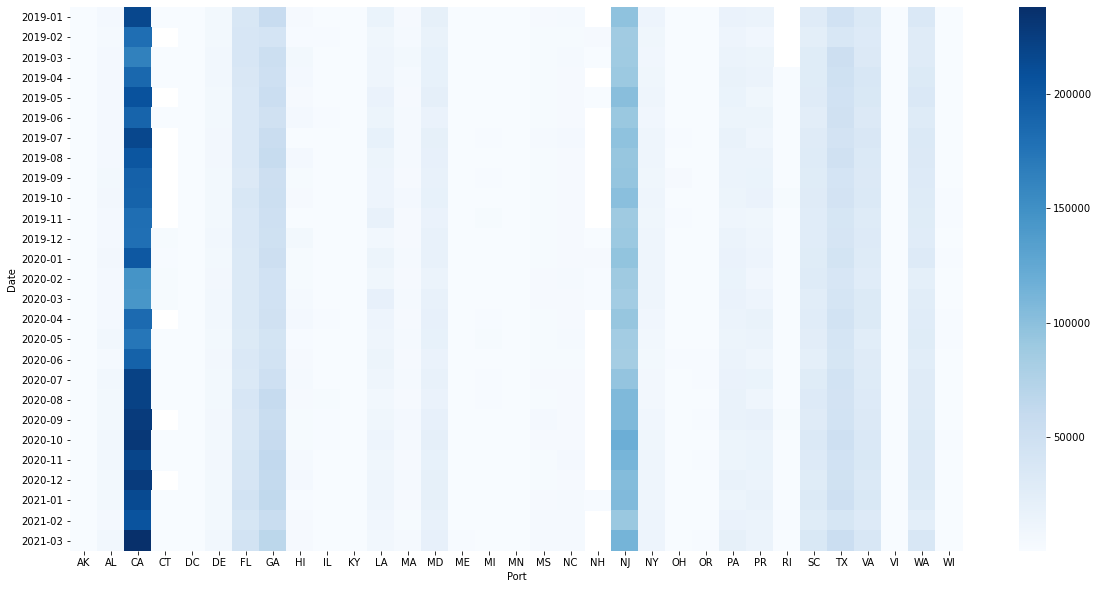

In [102]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(portTEUdf,cmap="Blues")
plt.show()

### Time Series International Trade: Monthly U.S. Imports by End-use Code <br>
The Census data API provides access to the most comprehensive set of data on current month and cumulative year-to-date imports using the End-use classification system. The End-use endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the district level for all U.S. trading partners.

In [103]:
useVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/enduse/variables.html')[0]
useVar

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIR_CHA_MO,15-digit Air Charges,Measures,not required,NaN,0,int,NaN,NaN
1,AIR_CHA_YR,15-digit Year-to-date Air Charges,Measures,not required,NaN,0,int,NaN,NaN
2,AIR_VAL_MO,15-digit Air Value,Measures,not required,NaN,0,int,NaN,NaN
3,AIR_VAL_YR,15-digit Year-to-Date Air Value,Measures,not required,NaN,0,int,NaN,NaN
4,AIR_WGT_MO,15-digit Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
5,AIR_WGT_YR,15-digit Year-to-Date Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
6,CAL_DUT_MO,"15-digit Imports for Consumption, Calculated Duty",Measures,not required,NaN,0,int,NaN,NaN
7,CAL_DUT_YR,"15-digit Year-to-Date Imports for Consumption, Calculated Duty",Measures,not required,NaN,0,int,NaN,NaN
8,CC_MO,15-digit Card Count,Measures,not required,NaN,0,int,NaN,NaN
9,CC_YR,15-digit Year-to-Date Card Count,Measures,not required,NaN,0,int,NaN,NaN


In [104]:
useDict = dict(zip(useVar["Name"], useVar["Label"].str.replace('15-digit ', '')))

In [105]:
useURL = 'https://api.census.gov/data/timeseries/intltrade/imports/enduse?get='
useURLreq = requests.get(f"{useURL}I_ENDUSE,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_WGT_MO,CON_VAL_MO,CC_MO&time=from+2019+to+2021&key={key}")
print(useURLreq.url)

https://api.census.gov/data/timeseries/intltrade/imports/enduse?get=I_ENDUSE,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_WGT_MO,CON_VAL_MO,CC_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [106]:
useData = useURLreq.json()
useDF = pd.DataFrame(useData, columns=useData[0]).drop([0]).rename(columns=useDict)
pd.set_option('display.max_colwidth', None)
useDF

,1- or 5-character Import ENDUSE Code,100-character Import ENDUSE Short Description,2-character District Code,50-character District name,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",Card Count,ISO-8601 Date/Time value
1,00110,DAIRY PRODUCTS AND EGGS,-,TOTAL FOR ALL DISTRICTS,27855468,154007917,4566,2019-01
2,0,"FOODS, FEEDS, AND BEVERAGES",-,TOTAL FOR ALL DISTRICTS,3210564497,12644009005,523308,2019-01
3,00000,GREEN COFFEE,-,TOTAL FOR ALL DISTRICTS,133696955,389845724,4346,2019-01
4,00010,COCOA BEANS,-,TOTAL FOR ALL DISTRICTS,30900280,108660535,312,2019-01
5,00020,CANE AND BEET SUGAR,-,TOTAL FOR ALL DISTRICTS,41121466,146421769,1688,2019-01
...,...,...,...,...,...,...,...,...
152785,16110,"BLANK TAPES, AUDIO & VISUAL",11,"PHILADELPHIA, PA",0,0,0,2021-03
152786,16110,"BLANK TAPES, AUDIO & VISUAL",15,"WILMINGTON, NC",647,23654,2,2021-03
152787,16110,"BLANK TAPES, AUDIO & VISUAL",16,"CHARLESTON, SC",381590,1951671,193,2021-03
152788,16110,"BLANK TAPES, AUDIO & VISUAL",17,"SAVANNAH, GA",21556,1172337,9,2021-03


In [107]:
useDF = useDF.rename(columns={'1- or 5-character Import ENDUSE Code':'code',"Containerized Vessel Shipping Weight":"Weight","Imports for Consumption, Total Value":"Value","ISO-8601 Date/Time value":"Date","100-character Import ENDUSE Short Description":"ENDUSE", '50-character District name': 'District'})
useDF

,code,ENDUSE,2-character District Code,District,Weight,Value,Card Count,Date
1,00110,DAIRY PRODUCTS AND EGGS,-,TOTAL FOR ALL DISTRICTS,27855468,154007917,4566,2019-01
2,0,"FOODS, FEEDS, AND BEVERAGES",-,TOTAL FOR ALL DISTRICTS,3210564497,12644009005,523308,2019-01
3,00000,GREEN COFFEE,-,TOTAL FOR ALL DISTRICTS,133696955,389845724,4346,2019-01
4,00010,COCOA BEANS,-,TOTAL FOR ALL DISTRICTS,30900280,108660535,312,2019-01
5,00020,CANE AND BEET SUGAR,-,TOTAL FOR ALL DISTRICTS,41121466,146421769,1688,2019-01
...,...,...,...,...,...,...,...,...
152785,16110,"BLANK TAPES, AUDIO & VISUAL",11,"PHILADELPHIA, PA",0,0,0,2021-03
152786,16110,"BLANK TAPES, AUDIO & VISUAL",15,"WILMINGTON, NC",647,23654,2,2021-03
152787,16110,"BLANK TAPES, AUDIO & VISUAL",16,"CHARLESTON, SC",381590,1951671,193,2021-03
152788,16110,"BLANK TAPES, AUDIO & VISUAL",17,"SAVANNAH, GA",21556,1172337,9,2021-03


In [108]:
enduse = useDF[(useDF.code =='0')|(useDF.code =='1')|(useDF.code =='2')|(useDF.code =='3')|(useDF.code =='4')|(useDF.code =='5')]
endusedata = enduse[~enduse['District'].str.contains("TOTAL")].drop(columns=['2-character District Code', 'code'])
endusedata

,ENDUSE,District,Weight,Value,Card Count,Date
149,"FOODS, FEEDS, AND BEVERAGES","PORTLAND, ME",4353666,184410357,8291,2019-01
150,"FOODS, FEEDS, AND BEVERAGES","ST. ALBANS, VT",0,51891441,3059,2019-01
151,"FOODS, FEEDS, AND BEVERAGES","BOSTON, MA",18490619,109523527,3203,2019-01
152,"FOODS, FEEDS, AND BEVERAGES","PROVIDENCE, RI",0,2573902,3,2019-01
153,"FOODS, FEEDS, AND BEVERAGES","OGDENSBURG, NY",0,200684083,14298,2019-01
...,...,...,...,...,...,...
151056,INDUSTRIAL SUPPLIES AND MATERIALS,U.S. VIRGIN ISLANDS,75930,24108,5,2021-03
151057,INDUSTRIAL SUPPLIES AND MATERIALS,"MIAMI, FL",226925933,804164720,17104,2021-03
151058,INDUSTRIAL SUPPLIES AND MATERIALS,"HOUSTON-GALVESTON, TX",677433334,3074813127,40436,2021-03
151059,INDUSTRIAL SUPPLIES AND MATERIALS,"WASHINGTON, DC",556754,91257719,1993,2021-03


In [109]:
endusedata = endusedata.rename(columns={'Card Count': 'Item_Count'})
endusedata

,ENDUSE,District,Weight,Value,Item_Count,Date
149,"FOODS, FEEDS, AND BEVERAGES","PORTLAND, ME",4353666,184410357,8291,2019-01
150,"FOODS, FEEDS, AND BEVERAGES","ST. ALBANS, VT",0,51891441,3059,2019-01
151,"FOODS, FEEDS, AND BEVERAGES","BOSTON, MA",18490619,109523527,3203,2019-01
152,"FOODS, FEEDS, AND BEVERAGES","PROVIDENCE, RI",0,2573902,3,2019-01
153,"FOODS, FEEDS, AND BEVERAGES","OGDENSBURG, NY",0,200684083,14298,2019-01
...,...,...,...,...,...,...
151056,INDUSTRIAL SUPPLIES AND MATERIALS,U.S. VIRGIN ISLANDS,75930,24108,5,2021-03
151057,INDUSTRIAL SUPPLIES AND MATERIALS,"MIAMI, FL",226925933,804164720,17104,2021-03
151058,INDUSTRIAL SUPPLIES AND MATERIALS,"HOUSTON-GALVESTON, TX",677433334,3074813127,40436,2021-03
151059,INDUSTRIAL SUPPLIES AND MATERIALS,"WASHINGTON, DC",556754,91257719,1993,2021-03


In [173]:
endusedata = endusedata[(endusedata.Item_Count != "0")]
endusedata

,ENDUSE,District,Weight,Value,Item_Count,Date
149,"FOODS, FEEDS, AND BEVERAGES","PORTLAND, ME",4353666,184410357,8291,2019-01
150,"FOODS, FEEDS, AND BEVERAGES","ST. ALBANS, VT",0,51891441,3059,2019-01
151,"FOODS, FEEDS, AND BEVERAGES","BOSTON, MA",18490619,109523527,3203,2019-01
152,"FOODS, FEEDS, AND BEVERAGES","PROVIDENCE, RI",0,2573902,3,2019-01
153,"FOODS, FEEDS, AND BEVERAGES","OGDENSBURG, NY",0,200684083,14298,2019-01
...,...,...,...,...,...,...
151056,INDUSTRIAL SUPPLIES AND MATERIALS,U.S. VIRGIN ISLANDS,75930,24108,5,2021-03
151057,INDUSTRIAL SUPPLIES AND MATERIALS,"MIAMI, FL",226925933,804164720,17104,2021-03
151058,INDUSTRIAL SUPPLIES AND MATERIALS,"HOUSTON-GALVESTON, TX",677433334,3074813127,40436,2021-03
151059,INDUSTRIAL SUPPLIES AND MATERIALS,"WASHINGTON, DC",556754,91257719,1993,2021-03


In [ ]:
j = (df.groupby(['Level','Employee_FN','Employee_LN'], as_index=False)
             .apply(lambda x: x[['Level','Employee_FN','Employee_LN']].to_dict('r'))
             .reset_index()
             .rename(columns={0:'Reports'})
             .to_json(orient='records'))

print(json.dumps(json.loads(j), indent=2, sort_keys=True))

In [174]:
endusedata.describe()

,ENDUSE,District,Weight,Value,Item_Count,Date
count,6778,6778,6778,6778,6778,6778
unique,6,44,5956,6749,5774,27
top,"CAPITAL GOODS, EXCEPT AUTOMOTIVE","WILMINGTON, NC",0,2302648,1,2020-01
freq,1160,162,783,5,40,253


In [175]:
grendusedata = endusedata.pivot(index=["Date","District"], columns=['ENDUSE'], values=['Weight','Value','Item_Count'])
grendusedata

Weight  \
ENDUSE                          AUTOMOTIVE VEHICLES, PARTS, AND ENGINES   
Date    District                                                          
2019-01 ANCHORAGE, AK                                             19114   
        BALTIMORE, MD                                          15942594   
        BOSTON, MA                                              3340796   
        BUFFALO, NY                                              430134   
        CHARLESTON, SC                                         71530313   
...                                                                 ...   
2021-03 TAMPA, FL                                              25250228   
        U.S. VIRGIN ISLANDS                                       19488   
        VESSELS UNDER OWN POWER                                     NaN   
        WASHINGTON, DC                                                0   
        WILMINGTON, NC                                          7125377   

                                                                  \
ENDUSE                          CAPITAL GOODS, EXCEPT AUTOMOTIVE   
Date    District                                                   
2019-01 ANCHORAGE, AK                                          0   
        BALTIMORE, MD                                   36474549   
        BOSTON, MA                                       9537160   
        BUFFALO, NY                                      1756035   
        CHARLESTON, SC                                 111773093   
...                                                          ...   
2021-03 TAMPA, FL                                       25613619   
        U.S. VIRGIN ISLANDS                                34372   
        VESSELS UNDER OWN POWER                                0   
        WASHINGTON, DC                                      7762   
        WILMINGTON, NC                                  24748912   

                                                                            \
ENDUSE                          CONSUMER GOODS FOODS, FEEDS, AND BEVERAGES   
Date    District                                                             
2019-01 ANCHORAGE, AK                    42059                     1090172   
        BALTIMORE, MD                 56644367                   100667211   
        BOSTON, MA                    27496933                    18490619   
        BUFFALO, NY                     911040                      227017   
        CHARLESTON, SC               109779437                    38911303   
...                                        ...                         ...   
2021-03 TAMPA, FL                     56702328                   124012350   
        U.S. VIRGIN ISLANDS              55739                      848428   
        VESSELS UNDER OWN POWER            NaN                         NaN   
        WASHINGTON, DC                  151025                        2823   
        WILMINGTON, NC                40092411                     5385039   

                                                                               \
ENDUSE                          INDUSTRIAL SUPPLIES AND MATERIALS OTHER GOODS   
Date    District                                                                
2019-01 ANCHORAGE, AK                                     2286933           0   
        BALTIMORE, MD                                   286643043      943174   
        BOSTON, MA                                       43797453      516778   
        BUFFALO, NY                                       2238372      267313   
        CHARLESTON, SC                                  327532132     1474800   
...                                                           ...         ...   
2021-03 TAMPA, FL                                       203702244      322752   
        U.S. VIRGIN ISLANDS                                 75930         NaN   
        VESSELS UNDER OWN POWER                               NaN         NaN

In [176]:
endusedata.groupby(['District','ENDUSE','Date'])

In [177]:
grendusedata.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1187 entries, ('2019-01', 'ANCHORAGE, AK') to ('2021-03', 'WILMINGTON, NC')
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   (Weight, AUTOMOTIVE VEHICLES, PARTS, AND ENGINES)      1109 non-null   object
 1   (Weight, CAPITAL GOODS, EXCEPT AUTOMOTIVE)             1160 non-null   object
 2   (Weight, CONSUMER GOODS)                               1135 non-null   object
 3   (Weight, FOODS, FEEDS, AND BEVERAGES)                  1094 non-null   object
 4   (Weight, INDUSTRIAL SUPPLIES AND MATERIALS)            1134 non-null   object
 5   (Weight, OTHER GOODS)                                  1146 non-null   object
 6   (Value, AUTOMOTIVE VEHICLES, PARTS, AND ENGINES)       1109 non-null   object
 7   (Value, CAPITAL GOODS, EXCEPT AUTOMOTIVE)              1160 non-null   object
 8   (Value

In [178]:
grendusedata.to_json("./static/data/grendusedata.json", orient='index')

In [179]:
grendusedata.to_csv("./static/data/grendusedata.csv")

In [180]:
endusedata.set_index('ENDUSE').to_csv("./static/data/endusedata.csv")

In [193]:
endusedata.set_index('Date').to_json("./static/data/endusedata.json", orient='table')

In [196]:
endusedata.melt().to_json("./static/data/meltendusedata.json")

In [207]:
endusedata.melt().to_csv("./static/data/meltendusedata.csv")

### Total Consumption by Date, Product and Value

In [117]:
enduseTOTAL = enduse[enduse['District'].str.contains("TOTAL")].drop(columns=['code','2-character District Code','Weight'])
enduseTOTAL = enduseTOTAL.drop(columns='District')
enduseTOTAL

,ENDUSE,Value,Card Count,Date
2,"FOODS, FEEDS, AND BEVERAGES",12644009005,523308,2019-01
19,INDUSTRIAL SUPPLIES AND MATERIALS,44950507635,1234962,2019-01
71,"CAPITAL GOODS, EXCEPT AUTOMOTIVE",54331936824,1793272,2019-01
104,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES",29685606011,1084642,2019-01
112,CONSUMER GOODS,56358827870,2865151,2019-01
...,...,...,...,...
150246,INDUSTRIAL SUPPLIES AND MATERIALS,51207023191,1476805,2021-03
150298,"CAPITAL GOODS, EXCEPT AUTOMOTIVE",64220503697,2122918,2021-03
150332,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES",32624755451,1209191,2021-03
150339,CONSUMER GOODS,62144896226,3258592,2021-03


In [118]:
useTCOL = enduseTOTAL.columns.drop(['ENDUSE',"Date"])
enduseTOTAL[useTCOL] = enduseTOTAL[useTCOL].apply(pd.to_numeric, errors='coerce')
enduseTOTAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 2 to 150370
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ENDUSE      162 non-null    object
 1   Value       162 non-null    int64 
 2   Card Count  162 non-null    int64 
 3   Date        162 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [119]:
valuePD = enduseTOTAL.pivot(index="Date", columns='ENDUSE', values='Value')
valuePD

ENDUSE,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES","CAPITAL GOODS, EXCEPT AUTOMOTIVE",CONSUMER GOODS,"FOODS, FEEDS, AND BEVERAGES",INDUSTRIAL SUPPLIES AND MATERIALS,OTHER GOODS
Date,,,,,,
2019-01,29685606011,54331936824,56358827870,12644009005,44950507635,8965165729
2019-02,29158685430,49793775442,48344054105,11072165193,37769028496,8692249924
2019-03,33732910210,57161020388,50246512101,13294785046,44147909110,9718542268
2019-04,31431903601,55664491361,53232710594,13324195211,45536655454,9444819220
2019-05,33464007823,59129342809,55837927149,13374820973,48996953683,10070663660
2019-06,32278897256,57021182865,51560575131,12404315309,42739922548,10230502263
2019-07,31418806173,58926891588,59709090714,12705244373,47132722515,10218649065
2019-08,32469109677,57692763752,58728025609,12196919202,44747759322,9241848523
2019-09,30047678791,55788883962,57880611040,11826211792,40860301414,10492241553


In [120]:
valuePD.describe()

ENDUSE,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES","CAPITAL GOODS, EXCEPT AUTOMOTIVE",CONSUMER GOODS,"FOODS, FEEDS, AND BEVERAGES",INDUSTRIAL SUPPLIES AND MATERIALS,OTHER GOODS
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,2.867985e+10,5.522129e+10,5.468721e+10,1.277207e+10,4.192468e+10,9.417741e+09
std,5.880849e+09,4.198822e+09,6.405704e+09,7.750835e+08,3.793883e+09,1.098520e+09
min,9.559681e+09,4.668228e+10,4.219771e+10,1.107217e+10,3.623128e+10,7.126396e+09
25%,2.850170e+10,5.321105e+10,5.029170e+10,1.239474e+10,3.878408e+10,8.830458e+09
50%,2.995237e+10,5.578888e+10,5.583793e+10,1.271863e+10,4.200831e+10,9.444819e+09
75%,3.222435e+10,5.748247e+10,5.899970e+10,1.323970e+10,4.418107e+10,9.982737e+09
max,3.407224e+10,6.422050e+10,6.625266e+10,1.518709e+10,5.120702e+10,1.194450e+10


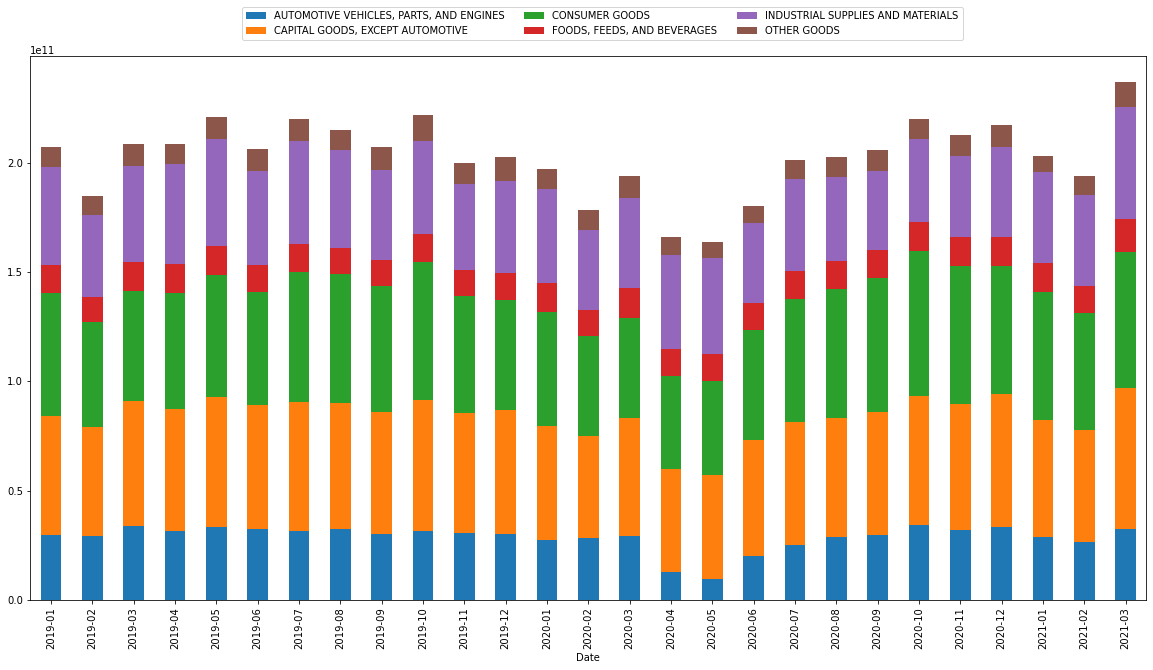

In [121]:
valuePD.plot(kind='bar', stacked=True, figsize=(20,10))
plt.legend(bbox_to_anchor =(0.84,1.1), ncol = 3)
plt.show()

In [122]:
valuePD.to_csv("./static/data/valuePD.csv")

In [123]:
valuePD.to_json("./static/data/valuePD.json")

In [124]:
stateportTEU.to_json("./static/data/stateportTEU.json")

ValueError: DataFrame index must be unique for orient='columns'.